In [30]:
import pandas as pd
import numpy as np

df = pd.read_csv("./insurance/insurance3r2.csv")


In [31]:
df.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1


In [32]:
df['age'] = pd.qcut(df['age'],q=10)
df['bmi'] = pd.qcut(df['bmi'],q=10)
df['steps'] = pd.qcut(df['steps'],q=10)
df['charges'] = pd.qcut(df['charges'],q=5)

In [33]:
df.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,"(17.999, 19.0]",0,"(27.36, 28.797]","(3007.0, 3010.0]",0,1,3,"(11399.857, 20260.626]",1
1,"(17.999, 19.0]",1,"(33.66, 35.86]","(3007.0, 3010.0]",1,0,2,"(1121.873, 3991.576]",1
2,"(24.0, 29.0]",1,"(32.032, 33.66]","(3007.0, 3010.0]",3,0,2,"(3991.576, 7369.053]",0
3,"(29.0, 34.0]",1,"(15.959000000000001, 22.99]","(8010.0, 10010.0]",0,0,1,"(20260.626, 63770.428]",0
4,"(29.0, 34.0]",1,"(28.797, 30.4]","(8007.0, 8010.0]",0,0,1,"(1121.873, 3991.576]",1


In [35]:
def encodeCategory(df,col):
    tempdf = df.sort_values(col,inplace=False)
    valuelist = tempdf[col].unique()
    valuedict = {}
    for i in range(len(valuelist)):
        valuedict[valuelist[i]] = i
    df[col] = df[col].replace(valuedict)
    return df[col]

In [36]:
df["age"] = encodeCategory(df,"age")
df["bmi"] = encodeCategory(df,"bmi")
df["charges"] = encodeCategory(df,"charges")
df["steps"] = encodeCategory(df,"steps")


In [37]:
df

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,0,0,3,2,0,1,3,3,1
1,0,1,7,2,1,0,2,0,1
2,2,1,6,2,3,0,2,1,0
3,3,1,0,9,0,0,1,4,0
4,3,1,4,8,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1333,7,1,5,5,3,0,1,2,0
1334,0,0,5,0,0,0,0,0,1
1335,0,0,8,2,0,0,2,0,1
1336,1,0,2,8,0,0,3,0,0


In [38]:
X = df.drop(['charges','region','insuranceclaim'], axis = 1)
y = df['charges']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [42]:
X

,age,sex,bmi,steps,children,smoker
0,0,0,3,2,0,1
1,0,1,7,2,1,0
2,2,1,6,2,3,0
3,3,1,0,9,0,0
4,3,1,4,8,0,0
...,...,...,...,...,...,...
1333,7,1,5,5,3,0
1334,0,0,5,0,0,0
1335,0,0,8,2,0,0
1336,1,0,2,8,0,0


In [43]:
lr = LinearRegression()

knn = KNeighborsRegressor(n_neighbors=10)

dt = DecisionTreeRegressor(max_depth = 3)

rf = RandomForestRegressor(max_depth = 3, n_estimators=500)

ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)

gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)

xgb = XGBRegressor(max_depth = 3, n_estimators=50, learning_rate =.2)

cb = CatBoostRegressor(learning_rate =.01, max_depth =5, verbose = 0)

regressors = [('Linear Regression', lr), ('K Nearest Neighbours', knn),
               ('Decision Tree', dt), ('Random Forest', rf), ('AdaBoost', ada),
              ('Gradient Boosting Regressor', gbr), ('XGBoost', xgb), ('catboost', cb)]


Linear Regression : 75 %
K Nearest Neighbours : 78 %
Decision Tree : 78 %
Random Forest : 79 %
AdaBoost : 78 %
Gradient Boosting Regressor : 81 %
XGBoost : 81 %
catboost : 81 %


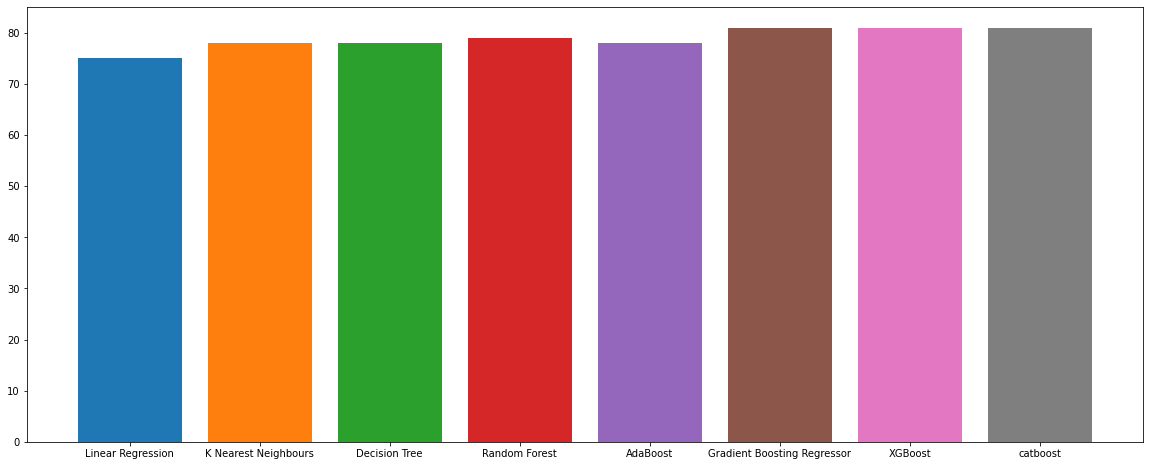

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import r2_score

for regressor_name, regressor in regressors:
 
    # Fit regressor to the training set
    regressor.fit(X_train, y_train)    
   
    # Predict 
    y_pred = regressor.predict(X_test)
    accuracy = round(r2_score(y_test,y_pred),2)*100
    

   
    # Evaluate  accuracy on the test set
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(regressor_name,accuracy)
    